In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
# Step 1: Generate synthetic traffic data
np.random.seed(0)
data_points = 1440  # Number of data points (1440 minutes in a day)
traffic_data = np.random.poisson(lam=50, size=data_points)  # Normal traffic using Poisson distribution


In [17]:
# Introduce anomalies by adding unusually high values
anomaly_indices = np.random.choice(data_points, size=10, replace=False)
traffic_data[anomaly_indices] = traffic_data[anomaly_indices] * 5  # Anomalies are 5x higher


In [19]:
# Create a DataFrame
data = pd.DataFrame({'Traffic': traffic_data})

# Save to CSV
data.to_csv('traffic-data.csv', index=False)
print("Synthetic traffic data saved to 'traffic-data.csv'")


Synthetic traffic data saved to 'traffic-data.csv'


In [21]:
# Step 2: Load traffic data from CSV
data = pd.read_csv('traffic-data.csv')

In [23]:
# Step 3: Prepare data for anomaly detection
X = data[['Traffic']].values  # Extract traffic values for anomaly detection

# Simulate true labels (for evaluation purposes)
# Normally, you'd have real labels for this step (1 = normal, -1 = attack)
y_true = np.array([1 if i not in anomaly_indices else -1 for i in range(len(data))])


In [25]:
# Step 4: Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.05)  # Set contamination rate (percentage of anomalies)
model.fit(X)

IsolationForest(contamination=0.05)

In [27]:
# Step 5: Predict anomalies (1 = normal, -1 = anomaly)
y_pred = model.predict(X)

In [29]:
# Step 6: Convert predictions to match the format (1 = normal, -1 = attack)
y_pred = np.where(y_pred == 1, 1, -1)

In [33]:
# Step 7: Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
precision, recall, _ = precision_recall_curve(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 96.18%
Confusion Matrix:
[[  10    0]
 [  55 1375]]


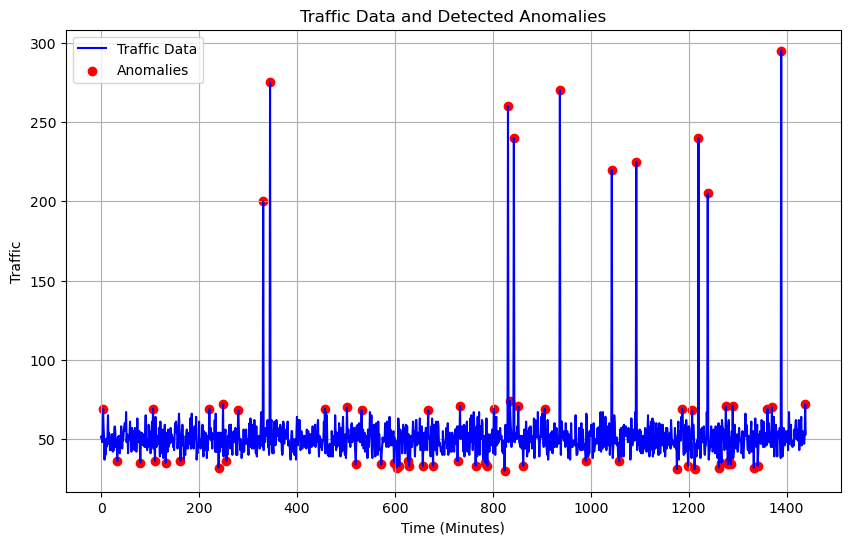

In [35]:
# Step 8: Visualize traffic data and anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['Traffic'], label='Traffic Data', color='blue')
plt.scatter(np.where(y_pred == -1)[0], data['Traffic'][y_pred == -1], color='red', label='Anomalies')
plt.xlabel('Time (Minutes)')
plt.ylabel('Traffic')
plt.title('Traffic Data and Detected Anomalies')
plt.legend()
plt.grid(True)
plt.savefig('anomalies_plot.png')
plt.show()

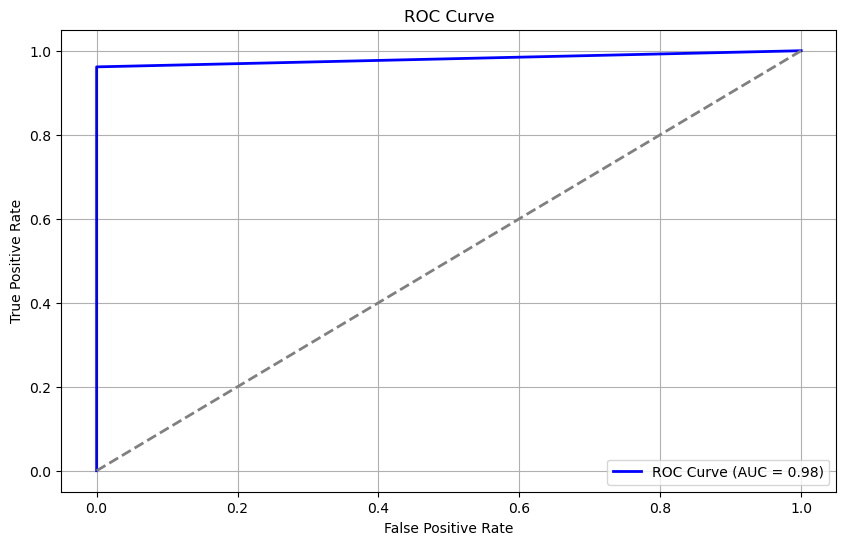

In [37]:
# Step 9: Additional Visualizations

# 9.1: ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


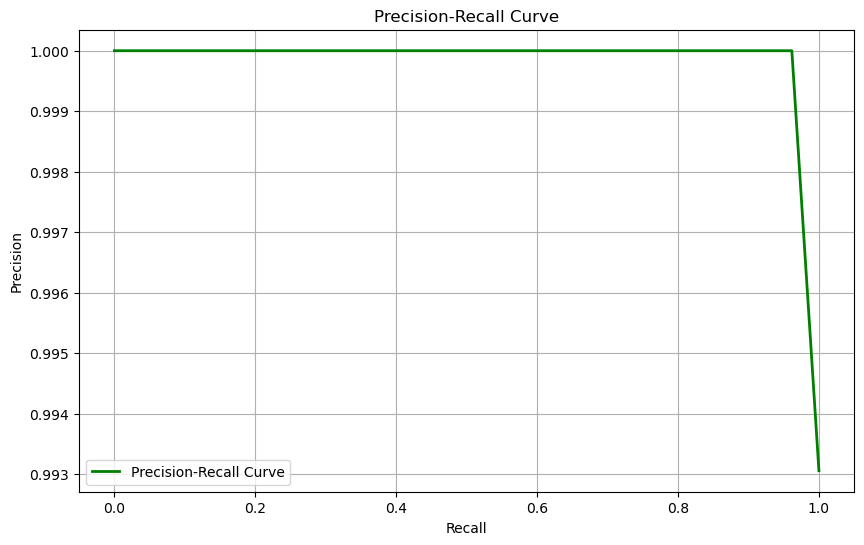

In [39]:
# 9.2: Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig('precision_recall_curve.png')
plt.show()

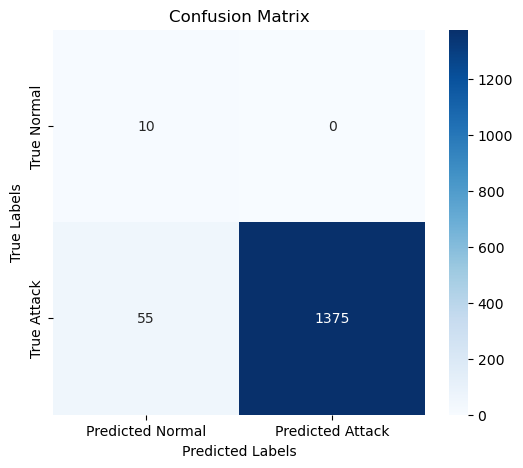

In [45]:
# Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

# 9.3 Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Normal', 'Predicted Attack'], yticklabels=['True Normal', 'True Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

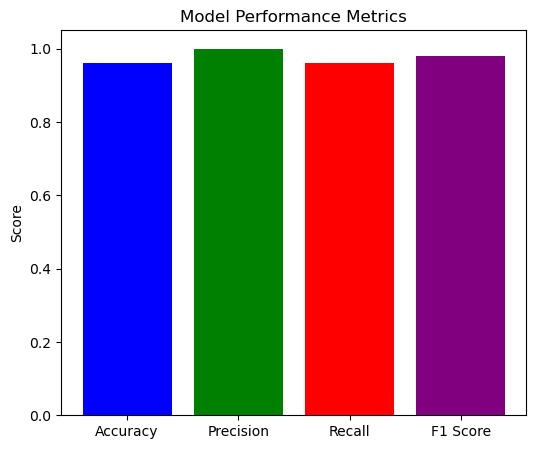

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
# Performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# 9.4 Accuracy, Precision, Recall, F1-Score Metrics Bar Plot
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6, 5))
plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

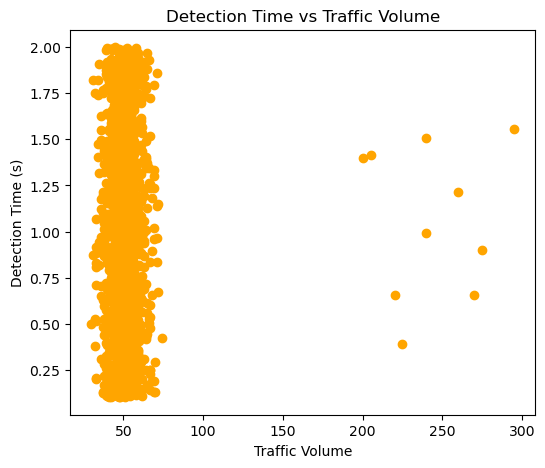

In [55]:
# 9.5 Time vs Traffic Volume (Example with detection times)
# Simulate detection time (for illustration)
detection_time = np.random.uniform(0.1, 2, size=len(X))  # Simulated detection times in seconds

plt.figure(figsize=(6, 5))
plt.scatter(X, detection_time, color='orange')
plt.title('Detection Time vs Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Detection Time (s)')
plt.show()

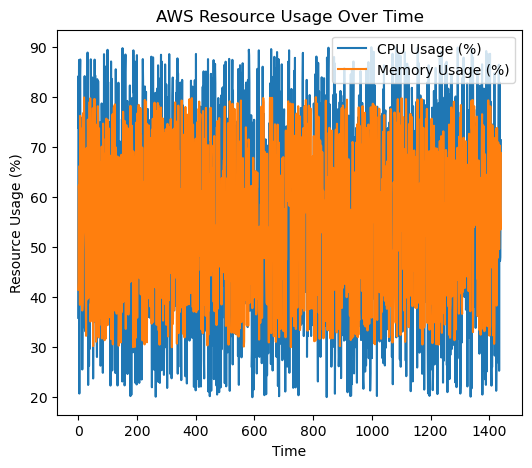

In [59]:
# 9.6 Simulated resource usage data (for demonstration)
time = np.arange(0, len(X))  # Time steps
cpu_usage = np.random.uniform(20, 90, size=len(X))  # CPU usage in %
memory_usage = np.random.uniform(30, 80, size=len(X))  # Memory usage in %

plt.figure(figsize=(6, 5))
plt.plot(time, cpu_usage, label='CPU Usage (%)')
plt.plot(time, memory_usage, label='Memory Usage (%)')
plt.title('AWS Resource Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Resource Usage (%)')
plt.legend()
plt.show()